<a href="https://colab.research.google.com/github/DaniloRiver/IA/blob/main/Modelo_bolsa_de_palabras_para_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga y Limpieza del Dataset

Preparación de datos

In [ ]:
import string
import re
from os import listdir
from numpy import array
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense

**Cargar los documentos en memoria**

In [ ]:
def load_documento(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

**Limpiar los documentos en tokens preparado para el modelado**

In [ ]:
def clean_documento(doc):
    tokens = doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# Definir un vocabulario

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

def add_doc_to_vocab(filename, vocab):
    doc = load_documento(filename)
    tokens = clean_documento(doc)
    vocab.update(tokens)


def process_docs(directory, vocab):
    for filename in listdir(directory):
        if filename.startswith('cv9'):
            continue
        path = directory + '/' + filename
        add_doc_to_vocab(path, vocab)

vocab = Counter()

process_docs('/content/drive/MyDrive/data/neg', vocab)
process_docs('/content/drive/MyDrive/data/pos', vocab)

print(len(vocab))
print(vocab.most_common(50))

44276
[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('bad', 1248), ('could', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


In [ ]:
umbral = 2
tokens = [k for k, c in vocab.items() if c >= umbral]
print(len(tokens))

25767


In [ ]:
def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [ ]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

vocab = Counter()
process_docs('/content/drive/MyDrive/data/neg', vocab)
process_docs('/content/drive/MyDrive/data/pos', vocab)

print(len(vocab))

umbral = 2
tokens = [k for k, c in vocab.items() if c >= umbral]
print(len(tokens))

save_list(tokens, 'vocab.txt')

44276
25767


In [ ]:
archivo = open("vocab.txt")
print(archivo.read())

plot
two
teen
couples
go
church
party
drink
drive
get
accident
one
guys
dies
girlfriend
continues
see
life
nightmares
whats
deal
watch
movie
sorta
find
critique
mindfuck
generation
touches
cool
idea
presents
bad
package
makes
review
even
harder
write
since
generally
applaud
films
attempt
break
mold
mess
head
lost
highway
memento
good
ways
making
types
folks
didnt
snag
correctly
seem
taken
pretty
neat
concept
executed
terribly
problems
well
main
problem
simply
jumbled
starts
normal
downshifts
fantasy
world
audience
member
going
dreams
characters
coming
back
dead
others
look
like
strange
apparitions
disappearances
chase
scenes
tons
weird
things
happen
explained
personally
dont
mind
trying
unravel
film
every
give
clue
kind
fed
biggest
obviously
got
big
secret
hide
seems
want
completely
final
five
minutes
make
entertaining
thrilling
engaging
meantime
really
sad
part
arrow
dig
flicks
actually
figured
halfway
point
strangeness
start
little
bit
sense
still
guess
bottom
line
movies
always
sure

**Cargar los documentos, llamar a la función de limipeza y devolver los tokens en formato de línea listos para procesar.**

In [ ]:

def doc_to_line(filename, vocab):
    doc = load_documento(filename)
    tokens = clean_documento(doc)
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

**Cargar todos los documentos en un directorio**

In [ ]:
def process_docs(directory, vocab, is_train):
    lines = list()
    for filename in listdir(directory):
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        path = directory + '/' + filename
        line = doc_to_line(path, vocab)
        lines.append(line)
    return lines

**Cargamos todas las reseñas positivas y negativas y las etiquetamos según la clase**

In [ ]:
def load_clean_dataset(vocab,is_train):
    neg = process_docs('/content/drive/MyDrive/data/neg', vocab, is_train)
    pos = process_docs('/content/drive/MyDrive/data/pos', vocab, is_train)
    docs = neg + pos
    labels = array([0 for _ in range(len(neg))] + [1 for _ in range(len(pos))])
    return docs, labels

**Creamos la instacia Tokenizer y realizamos el fit.**

In [ ]:
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

**Definimos el modelo que hemos utilizado en la evaluación**

In [ ]:
def define_model(n_words):
    model = Sequential()
    model.add(Dense(10, input_shape=(n_words,), activation='relu'))
    model.add(Dense(200,  activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    plot_model(model, to_file='model.png', show_shapes=True)
    model.summary()
    return model

# Predicción en datos no etiquetados

In [ ]:
def predict_sentiment(review, vocab, tokenizer, model):
    tokens = clean_documento(review)
    tokens = [w for w in tokens if w in vocab ]
    line = ' '.join(tokens)
    encoded = tokenizer.texts_to_matrix([line], mode='binary')
    yhat = model.predict(encoded, verbose=0)
    porcentaje_pos = yhat[0,0]
    if round(porcentaje_pos)==0:
      return (1-porcentaje_pos), 'Negativo'
    return  porcentaje_pos, 'Positiva'


In [ ]:
vocab_filename = 'vocab.txt'
vocab = load_documento(vocab_filename)
vocab = set(vocab.split())

train_docs, y_train = load_clean_dataset(vocab,True)
test_docs, y_test = load_clean_dataset(vocab,False)

tokenizer = create_tokenizer(train_docs)

X_train = tokenizer.texts_to_matrix(train_docs,mode='binary')
X_test = tokenizer.texts_to_matrix(test_docs,mode='binary')

n_words = X_train.shape[1]
model = define_model(n_words)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                257690    
                                                                 
 dense_1 (Dense)             (None, 200)               2200      
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 260,091
Trainable params: 260,091
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=15, verbose=2)

Epoch 1/15
57/57 - 3s - loss: 0.5531 - accuracy: 0.7389 - 3s/epoch - 52ms/step
Epoch 2/15
57/57 - 1s - loss: 0.0798 - accuracy: 0.9728 - 863ms/epoch - 15ms/step
Epoch 3/15
57/57 - 1s - loss: 0.0087 - accuracy: 1.0000 - 908ms/epoch - 16ms/step
Epoch 4/15
57/57 - 1s - loss: 0.0024 - accuracy: 1.0000 - 1s/epoch - 19ms/step
Epoch 5/15
57/57 - 1s - loss: 0.0013 - accuracy: 1.0000 - 993ms/epoch - 17ms/step
Epoch 6/15
57/57 - 1s - loss: 8.7144e-04 - accuracy: 1.0000 - 847ms/epoch - 15ms/step
Epoch 7/15
57/57 - 1s - loss: 6.0900e-04 - accuracy: 1.0000 - 826ms/epoch - 14ms/step
Epoch 8/15
57/57 - 1s - loss: 4.4205e-04 - accuracy: 1.0000 - 568ms/epoch - 10ms/step
Epoch 9/15
57/57 - 1s - loss: 3.2221e-04 - accuracy: 1.0000 - 533ms/epoch - 9ms/step
Epoch 10/15
57/57 - 1s - loss: 2.3951e-04 - accuracy: 1.0000 - 538ms/epoch - 9ms/step
Epoch 11/15
57/57 - 1s - loss: 1.8253e-04 - accuracy: 1.0000 - 547ms/epoch - 10ms/step
Epoch 12/15
57/57 - 1s - loss: 1.4310e-04 - accuracy: 1.0000 - 515ms/epoch - 9ms

In [ ]:
text_pos = "This is the best movie ever! This is a fantastic movie, I recommend it"
porcentaje, resena = predict_sentiment(text_pos,vocab, tokenizer, model)
print('Reseña: [%s]\nSentimento: %s (%.3f%%)' % (text_pos, resena, porcentaje*100))

text_neg = "So bad movie"
porcentaje, resena = predict_sentiment(text_neg,vocab, tokenizer, model)
print('Reseña: [%s]\nSentimento: %s (%.3f%%)' % (text_neg, resena, porcentaje*100))

Reseña: [This is the best movie ever! This is a fantastic movie, I recommend it]
Sentimento: Positiva (70.520%)
Reseña: [So bad movie]
Sentimento: Negativo (77.219%)


In [ ]:
text_pos = "So bad movie"
print('Reseña: [%s]\nSentimento: %s (%.3f%%)' % (text_pos, resena, porcentaje*100))

text_neg = "This movie was a complete waste of time. The plot was confusing, the characters were unconvincing, and the acting was terrible. I can't believe I spent money on this."
porcentaje, resena = predict_sentiment(text_neg,vocab, tokenizer, model)
print('Reseña: [%s]\nSentimento: %s (%.3f%%)' % (text_neg, resena, porcentaje*100))

Reseña: [So bad movie]
Sentimento: Negativo (77.219%)
Reseña: [This movie was a complete waste of time. The plot was confusing, the characters were unconvincing, and the acting was terrible. I can't believe I spent money on this.]
Sentimento: Negativo (97.075%)


Aciertos Positivos: 4
Errores Positivos: 0
Aciertos Negativos: 5
Errores Negativos: 1


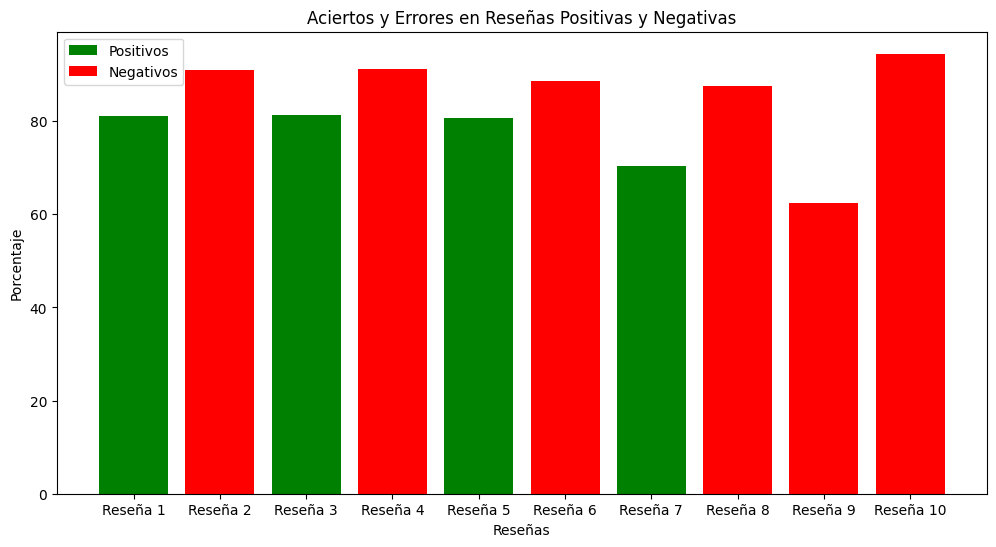

In [ ]:
import matplotlib.pyplot as plt

# Lista de reseñas y sus verdaderas etiquetas
# Agregar más reseñas a la lista
reviews=[
    ("I was pleasantly surprised by this movie. The story was touching, and the performances were outstanding. A must-watch!", 'Positiva'),
    ("I found this film to be incredibly boring. The pacing was slow, and I couldn't connect with the characters at all. Disappointing.", 'Negativa'),
    ("This movie is a true masterpiece. The cinematography, soundtrack, and acting are all exceptional. I was moved to tears.", 'Positiva'),
    ("Avoid this movie at all costs. It's a total disaster. The dialogue is cringeworthy, and the plot is a mess.", 'Negativa'),
    ("I couldn't stop laughing throughout the entire film. It's a hilarious comedy that had me in stitches. Highly recommended!", 'Positiva'),
    ("This movie is a total letdown. The trailers looked promising, but the actual film was a letdown. Save your money.", 'Negativa'),
    ("A cinematic gem! This film is a work of art. The direction and performances are top-notch. I can't praise it enough.", 'Positiva'),
    ("I wanted to walk out of the theater halfway through. The storyline was shallow, and the characters were one-dimensional. Waste of time.", 'Negativa'),
    ("An instant classic! I was blown away by this movie. It's a must-see for any film enthusiast. I can't wait to watch it again.", 'Positiva'),
    ("I can't believe I wasted two hours of my life on this movie. The script is terrible, and the acting is cringe-inducing. Avoid it.", 'Negativa')
]




# Inicializar contadores de aciertos y errores
aciertos_positivos = 0
errores_positivos = 0
aciertos_negativos = 0
errores_negativos = 0

# Listas para almacenar los resultados
positivos = []
negativos = []

# Listas para almacenar las etiquetas verdaderas y predichas
etiquetas_verdaderas = []
etiquetas_predichas = []

# Realizar predicciones para cada reseña y contar aciertos y errores
for review, etiqueta_verdadera in reviews:
    porcentaje, resena = predict_sentiment(review, vocab, tokenizer, model)
    etiquetas_verdaderas.append(etiqueta_verdadera)
    etiquetas_predichas.append(resena)

    if resena == 'Positiva':
        if etiqueta_verdadera == 'Positiva':
            aciertos_positivos += 1
        else:
            errores_positivos += 1
        positivos.append(porcentaje * 100)
        negativos.append(0)  # Agregamos 0 para el eje de negativos
    else:
        if etiqueta_verdadera == 'Negativa':
            aciertos_negativos += 1
        else:
            errores_negativos += 1
        negativos.append(porcentaje * 100)
        positivos.append(0)  # Agregamos 0 para el eje de positivos

# Etiquetas de las reseñas
etiquetas = [f'Reseña {i+1}' for i in range(len(reviews))]

# Crear una figura de barras para aciertos y errores
plt.figure(figsize=(12, 6))
plt.bar(etiquetas, positivos, label='Positivos', color='green')
plt.bar(etiquetas, negativos, label='Negativos', color='red', bottom=positivos)

# Configurar etiquetas y título
plt.xlabel('Reseñas')
plt.ylabel('Porcentaje')
plt.title('Aciertos y Errores en Reseñas Positivas y Negativas')
plt.legend()

# Mostrar el número de aciertos y errores
print(f'Aciertos Positivos: {aciertos_positivos}')
print(f'Errores Positivos: {errores_positivos}')
print(f'Aciertos Negativos: {aciertos_negativos}')
print(f'Errores Negativos: {errores_negativos}')

# Mostrar la gráfica de aciertos y errores
plt.show()






7/7 [==============================] - 0s 5ms/step
Precisión: 0.94
Matriz de Confusión:
[[97  3]
 [ 8 92]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       100
           1       0.97      0.92      0.94       100

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.94       200



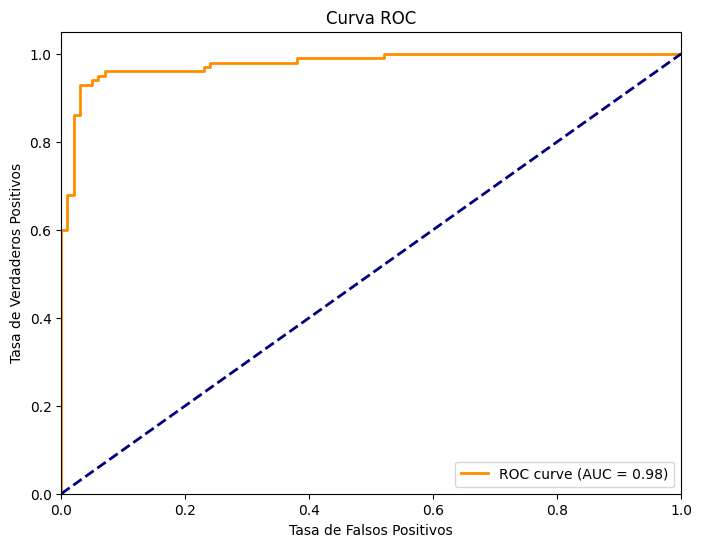

In [ ]:
# Importar las métricas y la matriz de confusión
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Redondear las predicciones a etiquetas binarias (0 o 1)
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Precisión: {accuracy:.2f}')

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_binary)
print('Matriz de Confusión:')
print(confusion)

# Generar un informe de clasificación
classification_rep = classification_report(y_test, y_pred_binary)
print('Informe de Clasificación:')
print(classification_rep)

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()




7/7 [==============================] - 0s 4ms/step


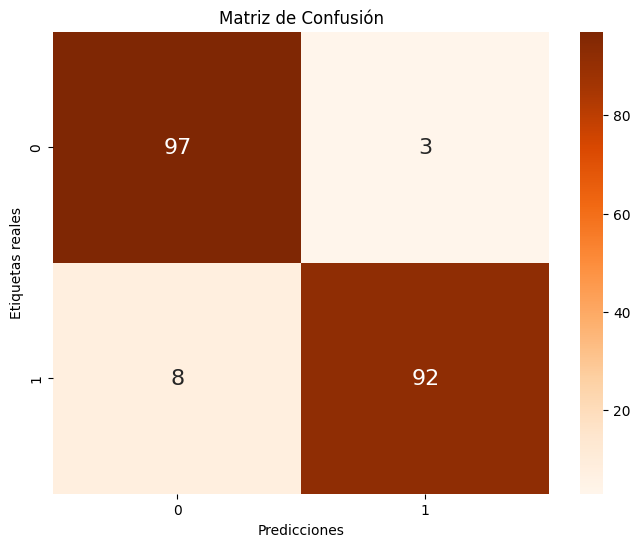

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Realiza predicciones en los datos de prueba
y_pred = model.predict(X_test)
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

# Calcula la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_binary)

# Crea un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Oranges', cbar=True, annot_kws={"size": 16})
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión')
plt.show()
plt.savefig('confusion_matrix.png')